# Evaluation
In this notebook, I aim to bring together the results produced in all 13 modeling notebooks located in the Model folder. Using these results, I hope develop recommendations on which three index funds investors should consider investing.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')

In [2]:
# for google colab
# skip if working on jupyter notebook
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


# Read In Files
Here we have the csv files created in the Modeling notebook. These files contain a summary of the results from modeling and forecasting each fund. 

In [3]:
# If working on jupyter notebook use:
# rmses_df = pd.read_csv('./Modeling/model_rmses.csv')
# rois_df = pd.read_csv('./Modeling/rois.csv')

rmses_df = pd.read_csv('/drive/My Drive/Stock_Forecasting/Modeling/model_rmses.csv')
rois_df = pd.read_csv('/drive/My Drive/Stock_Forecasting/Modeling/rois.csv')

In [4]:
rmses_df = rmses_df.drop('Unnamed: 0', axis=1)
rois_df = rois_df.drop('Unnamed: 0', axis=1)

In [5]:
rmses_df

,Model,NASDX_RMSEs,IVV_RMSEs,VFIAX_RMSEs,VTSAX_RMSEs,QQQ_RMSEs,SWPPX_RMSEs,SWTSX_RMSEs,FXAIX_RMSEs,VUG_RMSEs,DIA_RMSEs,SPY_RMSEs,VOO_RMSEs,VTWO_RMSEs
0,Baseline,2.047809,25.747396,23.754751,6.720160,22.488292,4.002403,4.794217,8.897243,18.027399,22.877579,25.613167,23.600016,15.034654
1,ARIMA,2.292706,36.026600,33.119191,7.658805,22.830807,5.890846,5.779298,12.634950,21.115098,20.143136,35.735622,32.937877,73.850636
2,LSTM,0.432891,4.124593,4.080433,1.077314,5.309794,0.691213,0.820236,1.460771,3.685428,2.945879,4.413672,3.852907,5.297022
3,FBprophet,5.670109,32.488233,31.884724,10.883668,63.844688,5.617840,7.457487,11.723050,41.450437,24.605617,35.484111,31.302444,102.428854


In [6]:
rois_df

,NASDX_ROI,IVV_ROI,VFIAX_ROI,VTSAX_ROI,QQQ_ROI,SWPPX_ROI,SWTSX_ROI,FXAIX_ROI,VUG_ROI,DIA_ROI,SPY_ROI,VOO_ROI,VTWO_ROI
0,0.267214,0.33298,0.400738,0.421071,0.318488,0.368498,0.508993,0.385973,0.293362,0.185695,0.424128,0.356532,0.953169


# Model Performace

In [7]:
rmses_df_copy = rmses_df.copy().set_index('Model')

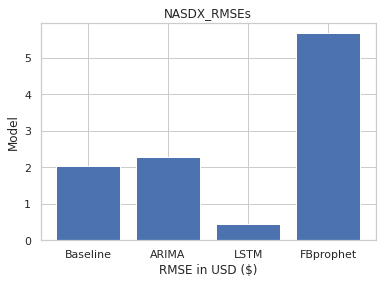

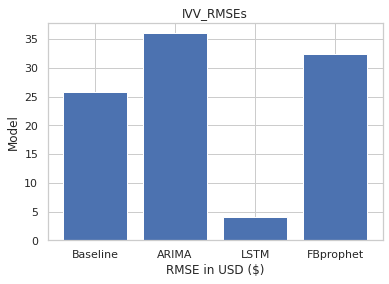

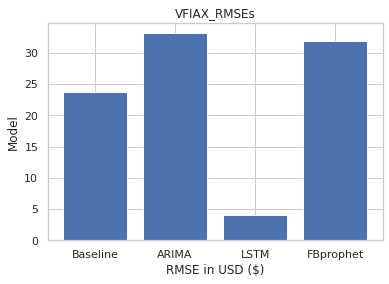

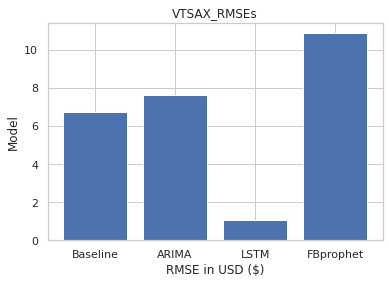

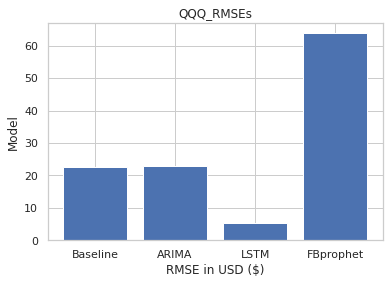

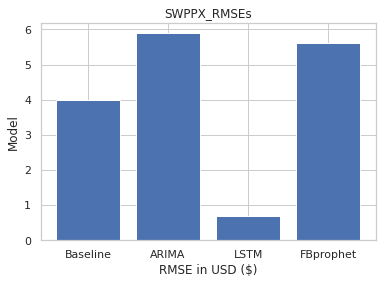

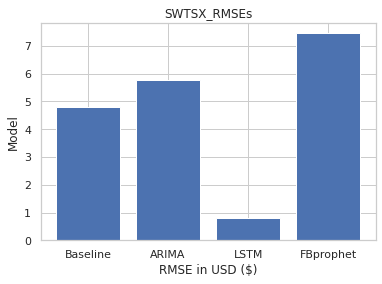

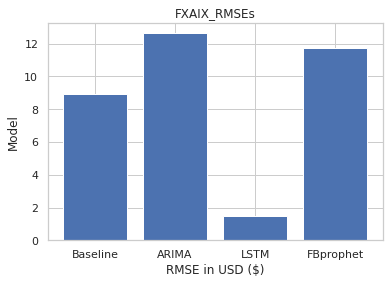

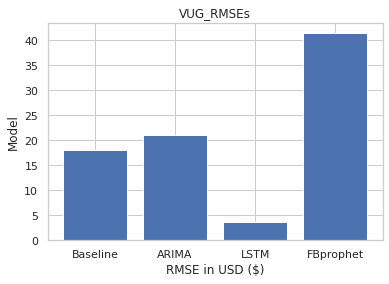

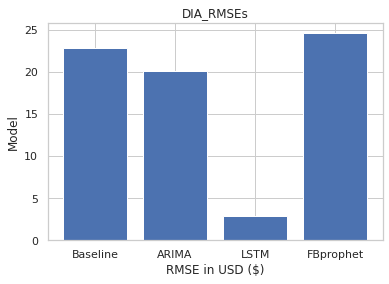

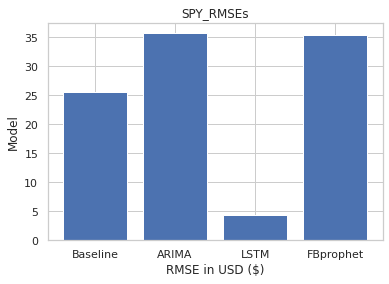

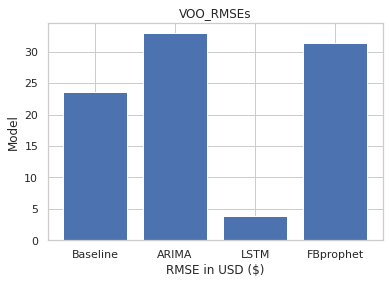

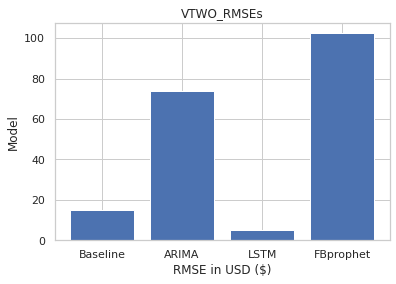

In [8]:
for col in rmses_df_copy.columns:
    plt.bar(rmses_df_copy.index,rmses_df_copy[col])
    plt.title(col)
    plt.xlabel('RMSE in USD ($)')
    plt.ylabel('Model')
    plt.show()

For all funds, the LSTM model was the best performing model that yielded the lowest RMSE. In most cases, the ARIMA and FBprophet failed to outperform the baseline model. This means that the LSTM model will provide us with the most accurate predictions of close prices.

Now to summarize these 13 observations in one bar chart, we will plot out the average RMSE score for each model.



In [9]:
avg_model_rmse = []
for i in range(4):
    model = rmses_df.iloc[i,0]
    scores = np.mean(rmses_df.iloc[i,1:].values)
    avg_model_rmse.append((model,scores))
avg_model_rmse

[('Baseline', 15.661929615997508),
 ('ARIMA', 23.847351745634132),
 ('LSTM', 2.937857939748132),
 ('FBprophet', 31.14163559967664)]

In [10]:
avg_model_rmse_df = pd.DataFrame()

In [11]:
avg_model_rmse_df['Model'] = [x[0] for x in avg_model_rmse]
avg_model_rmse_df['Avg Model RMSE'] = [x[1] for x in avg_model_rmse]
avg_model_rmse_df = avg_model_rmse_df.sort_values(by=['Avg Model RMSE'],ascending = False)
avg_model_rmse_df

,Model,Avg Model RMSE
3,FBprophet,31.141636
1,ARIMA,23.847352
0,Baseline,15.661930
2,LSTM,2.937858


In [12]:
# shows values of bars on bar chart
def show_values_on_bars_usd(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '$'+'{:.2f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center", fontsize=14) 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

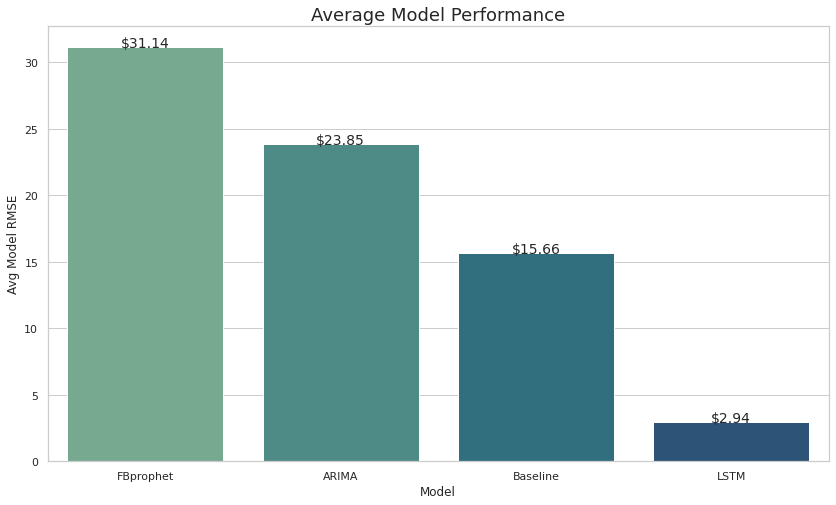

In [13]:
fig, ax = plt.subplots(figsize=(14,8))
ax.set_title('Average Model Performance',fontsize=18)
sns.barplot(x="Model", y="Avg Model RMSE", data=avg_model_rmse_df,ax=ax, palette='crest')
show_values_on_bars_usd(ax);

# Visualizing LSTM Models RMSEs

In [14]:
lstm_rmses = rmses_df.iloc[2,1:]
lstm_rmses_sorted = lstm_rmses.sort_values(ascending=False)
lstm_rmses_sorted

QQQ_RMSEs       5.30979
VTWO_RMSEs      5.29702
SPY_RMSEs       4.41367
IVV_RMSEs       4.12459
VFIAX_RMSEs     4.08043
VOO_RMSEs       3.85291
VUG_RMSEs       3.68543
DIA_RMSEs       2.94588
FXAIX_RMSEs     1.46077
VTSAX_RMSEs     1.07731
SWTSX_RMSEs    0.820236
SWPPX_RMSEs    0.691213
NASDX_RMSEs    0.432891
Name: 2, dtype: object

In [15]:
lstm_rmses_sorted.index = ['NASDX','IVV','VFIAX','VTSAX','QQQ','SWPPX','SWTSX','FXAIX','VUG','DIA','SPY','VOO','VTWO']

In [16]:
lstm_rmses_sorted

NASDX     5.30979
IVV       5.29702
VFIAX     4.41367
VTSAX     4.12459
QQQ       4.08043
SWPPX     3.85291
SWTSX     3.68543
FXAIX     2.94588
VUG       1.46077
DIA       1.07731
SPY      0.820236
VOO      0.691213
VTWO     0.432891
Name: 2, dtype: object

In [17]:
lstm_rmses_sorted = pd.DataFrame(lstm_rmses_sorted).reset_index()
lstm_rmses_sorted.columns = ['Ticker','RMSE']
lstm_rmses_sorted

,Ticker,RMSE
0,NASDX,5.30979
1,IVV,5.29702
2,VFIAX,4.41367
3,VTSAX,4.12459
4,QQQ,4.08043
5,SWPPX,3.85291
6,SWTSX,3.68543
7,FXAIX,2.94588
8,VUG,1.46077
9,DIA,1.07731


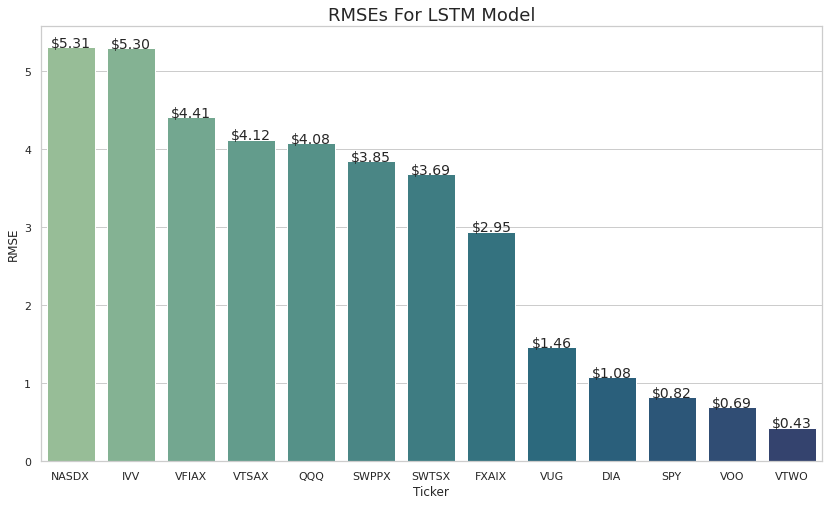

In [18]:
fig, ax = plt.subplots(figsize=(14,8))
ax.set_title('RMSEs For LSTM Model',fontsize=18)
sns.barplot(x="Ticker", y="RMSE", data=lstm_rmses_sorted,ax=ax, palette='crest')
show_values_on_bars_usd(ax);

# Projected One Year ROIs 
After establishing our most optimal predictive model, the LSTM model, we then moved along to applying it to make our recommendations.

In order to make our recommendations on which funds investors should consider, we need to look at the projected one year ROIs for all the funds. This will tell us how much our investment will grow in one year if we purchase a specific fund today. We will recommend the top 3 funds. 

For each fund, using the LSTM model, we predicted all the daily close prices starting from the next day to January 10, 2023. This is exactly one year from the last date in our index_funds_data.csv data that we started with. Using the close prices from 2022-01-10 and 2023-01-10, we calculated this ROI for each fund. This was all calculated in the Modeling notebooks. Here we will summarize all the ROIs. 


In [19]:
rois_df = rois_df.T

In [20]:
rois_df.index = ['NASDX','IVV','VFIAX','VTSAX','QQQ','SWPPX','SWTSX','FXAIX','VUG','DIA','SPY','VOO','VTWO']
rois_df.columns = ['ROI %']

In [21]:
sorted_roi = rois_df['ROI %'].sort_values(ascending=False)
sorted_roi = pd.DataFrame(sorted_roi).reset_index()
sorted_roi.columns = ['Ticker','ROI %']
sorted_roi['ROI %'] = sorted_roi['ROI %']*100
sorted_roi

,Ticker,ROI %
0,VTWO,95.316911
1,SWTSX,50.899325
2,SPY,42.412755
3,VTSAX,42.107067
4,VFIAX,40.073765
5,FXAIX,38.597268
6,SWPPX,36.849808
7,VOO,35.653162
8,IVV,33.297988
9,QQQ,31.848775


In [22]:
def show_values_on_bars_percent(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.2f}'.format(p.get_height()) + '%'
            ax.text(_x, _y, value, ha="center", fontsize=14) 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

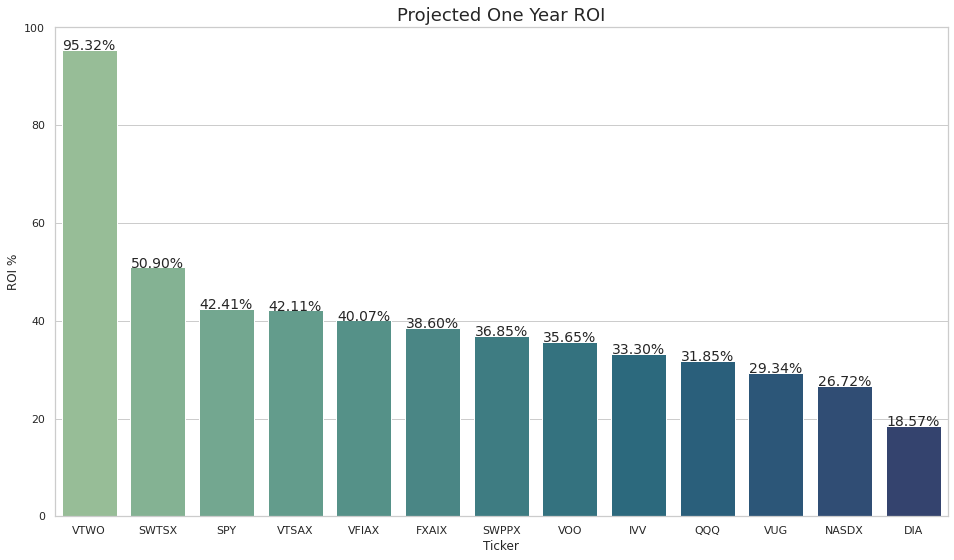

In [23]:
fig, ax = plt.subplots(figsize=(16,9))
ax.set_title('Projected One Year ROI',fontsize=18)
sns.barplot(x="Ticker", y="ROI %", data=sorted_roi,ax=ax, palette='crest')
show_values_on_bars_percent(ax);

# Conclusion
The graph shows us the the ROIs of the close price for each fund over the next year. Based on the ROIs, the recommended funds worth purchasing are VTWO, SWTSX, and SPY. Although these these are the recommendations drawn from the projected ROIs, the ROIs appear to be unsually high. Before making final recommendations, further investigation is need to confirm if these are convincing ROIs. 

The next steps towards confirming or disproving the projected ROIs will be to collect more data. The data collected from tiingo API only provides 5 years worth of data. By collecting more data that extends beyond 5 years, the model may be able to pick up different patterns. Next, consulting with others who hold more domain knowledge can also be useful. And my last step would be to conduct further tuning on the LSTM model.